This notebook contains the functions after reworking the corresponding sweeping function so it works prorerly con starting times different from 0, the correctio so far is just ading the starting time to the new_time, this also simplifies the sweeping function, since now I don't have to recode it for the special case of $n=0$ .
So far I am going to olny work with fixed duration times, after the sweeping function for the time domain does what it is supossed to, I'll implement the corresponding sweeping with respect of duration.

1. Make seeping function work with intervals startinf in a  number $\neq 0$ $\checkmark$.
2. Make that function work for $n=0$, combining it with Pul $\checkmark$.
3. Modify then that funciton to act on the pulse list given the condition of Sweep time.  $\checkmark$.
4. Search and correct the bugs.
5. Implement Sweeping with Duration.

In [1]:
%matplotlib inline 

In [1]:
%matplotlib widget

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [56]:
Rabi={
    'Amplitude' : 10 ,
    'Start Duration' : 5,
    'End Duration': 5,
    'Start time' : 1e-10,
    'End time': 2e-10,
    'Sweep time': 0
}

In [3]:
Probe1={
    'Amplitude' : 2 ,
    'Start Duration' : 7,
    'End Duration': 7 ,
    'Start time' : 0,
    'End time': 20,
    'Sweep time': 1
}

In [57]:
Probe2={
    'Amplitude' : 6 ,
    'Start Duration' : 4,
    'End Duration': 4 ,
    'Start time' : 5,
    'End time': 11,
    'Sweep time': 1
}

In [58]:
Probe3={
    'Amplitude' : 5 ,
    'Start Duration' : 5,
    'End Duration': 5 ,
    'Start time' : 5,
    'End time': 10,
    'Sweep time': 1
}

## Different Pulse schemes given by differnt dictionaries

In [6]:
Pulses_List3=[Rabi,Probe1,Probe2];
Pulses_List=[Rabi,Probe1];
Pulses_List2=[Rabi,Probe2];

## Time interval for plotting purposes:

In [45]:
trog=np.linspace(-1e-10,50,1000)

# Here are the new functions, making them so they call one another

In [7]:
def Pul(Pulse,t):
    "single pulse generating function"
    pol= Pulse['Amplitude']*( Pulse['Start time'] <= t <= Pulse['Start Duration'] + Pulse['Start time'])
    return pol

In [92]:
#just testing if the base Pul function works
polso=np.array([Pul(Probe3,x) for x in np.linspace(-1,20,1000)])

<IPython.core.display.Javascript object>


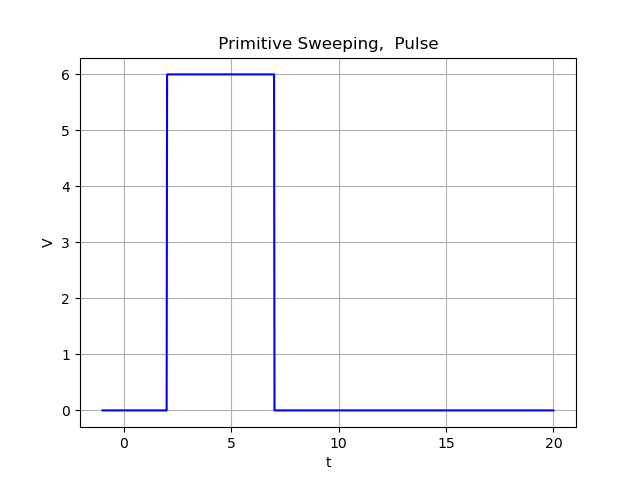

In [10]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(np.linspace(-1,20,1000),polso,'-b')
#plt.step(trog,obo0,'-g')
#plt.step(trog,obo10,'-r')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse ')
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [93]:
#pulse list, I didn't use it at the end, bcause I implemented the function in an easer way
def Pl(PulList,t):
    """Pulse generating function, directly from the specified information given by it's corresponding dictionary, stored in the list PulList,at a time interval given by time"""
    time=np.linspace(-1e-10,t,1000)
    pl=np.zeros((len(PulList),len(time))) 
    for i in range(0,len(PulList)):
        pl[i]=[Pul(PulList[i],x) for x in time ]
    y=np.zeros(len(pl[0]))
    for i in range(0,len(pl)):
        y += pl[i]
    return y

In [9]:
#sweeping function 
def sweep0(Pulse,N,n,t):
    """Sweeping function for a single pulse"""
    dt=(Pulse['End time'] - Pulse['Start time'])/N
    new_start=n*dt + Pulse['Start time']
    dτ=(Pulse['End Duration'] - Pulse['Start Duration'])/N
    new_duration= n*dτ
    pol= Pulse['Amplitude'] * (  new_start <=  t <= Pulse['End Duration'] + new_start)
    return pol

In [48]:
#a copy?
def sweep0(Pulse,N,n,t):
    """Sweeping function for a single pulse"""
    dt=(Pulse['End time'] - Pulse['Start time'])/N
    new_start=n*dt + Pulse['Start time']
    dτ=(Pulse['End Duration'] - Pulse['Start Duration'])/N
    new_duration= n*dτ
    pol= Pulse['Amplitude'] * (  new_start <=  t <= Pulse['End Duration'] + new_start)
    return pol

In [25]:
#sweep or not depending on the 'Sweep time' key
def sweep(Pulse,N,n,t):
    "Function that either perfoms a sweep or just leaves the Pulse at Startin time, depending on the Sweep parameter"
    if Pulse['Sweep time'] == 0:
        pol=Pul(Pulse,t)
    if Pulse['Sweep time'] == 1:
        pol = sweep0(Pulse,N,n,t)
    return pol

# Tests to to see if sweep function works:

after implementing the condition given by Sweep time

In [26]:
trog=np.linspace(1e-10,20,1000)

In [22]:
PulsoG={
    'Amplitude' : 6 ,
    'Start Duration' : 3,
    'End Duration': 3 ,
    'Start time' : 3,
    'End time': 9,
    'Sweep time': 1
}

In [23]:
obo20=np.array([sweep(PulsoG,100,100,x) for x in trog]);
obo0=np.array([sweep(PulsoG,100,0,x) for x in trog]);
obo10=np.array([sweep(PulsoG,100,50,x) for x in trog])

<IPython.core.display.Javascript object>


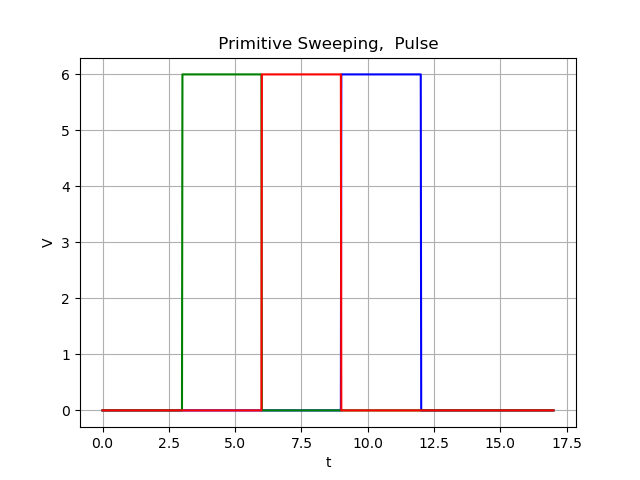

In [24]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog,obo20,'-b',label='End Pulse')#blue  = end
plt.plot(trog,obo0,'-g',label='Start Pulse') #green = start
plt.plot(trog,obo10,'-r',label='Mittel Pulse') #red = mittel
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse ')
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

need to add the correct behaviour for the condition of Sweep time, and for n=0

It seems that it works, there are some caviets when trying to sweep to the left, but that may be corrected easely by implementeng a function for the orientation of the sweeping, adding a orientation key to the pulse dictionary: 'right' or 'left'. When left is read, the corresponding function swaps 'start time' with 'end time'. I think for now I'll leave it like this, and when this base function works, I can start treating this caviets.

Now to implement the function that can read pulse schemes and implements the sweeping directly.

In [7]:
def Pul(Pulse,t):
    "single pulse generating function"
    pol= Pulse['Amplitude']*( Pulse['Start time'] <= t <= Pulse['Start Duration'] + Pulse['Start time'])
    return pol

In [48]:
def sweep0(Pulse,N,n,t):
    """Sweeping function for a single pulse"""
    dt=(Pulse['End time'] - Pulse['Start time'])/N
    new_start=n*dt + Pulse['Start time']
    dτ=(Pulse['End Duration'] - Pulse['Start Duration'])/N
    new_duration= n*dτ
    pol= Pulse['Amplitude'] * (  new_start <=  t <= Pulse['End Duration'] + new_start)
    return pol

In [25]:
#sweep or not depending on the 'Sweep time' key
def sweep(Pulse,N,n,t):
    "Function that either perfoms a sweep or just leaves the Pulse at Startin time, depending on the Sweep parameter"
    if Pulse['Sweep time'] == 0:
        pol=Pul(Pulse,t)
    if Pulse['Sweep time'] == 1:
        pol = sweep0(Pulse,N,n,t)
    return pol

## List Version

adding also the direct implementation of the time interval for a given t


In [35]:
def Sweep(PulList,N,n,t):
    "function that perfoms or not a Sweeping for a Pulse Scheme given by a list of Pulses, the sweeping is determined by the"
    "value of the corresponding 'Sweep time' key: 1= sweeping, 0= no sweeping"
    time=np.linspace(-1e-10,t,1000)
    pulList=np.zeros((len(PulList),len(time)))
    for i in range(0,len(PulList)):
        pulList[i]=np.array([sweep(PulList[i],N,n,x) for x in time])
    y=np.zeros(len(pulList[0]))
    for i in range(0,len(pulList)):
        y += pulList[i]
    return y

In [29]:
Pulses_List3=[Rabi,Probe1,Probe2];
Pulses_List=[Rabi,Probe1];
Pulses_List2=[Rabi,Probe2];

yes king

In [48]:
obos0=Sweep(Pulses_List,100,0,50);
obos50=Sweep(Pulses_List,100,50,50);
obos100=Sweep(Pulses_List,100,100,50);

<IPython.core.display.Javascript object>


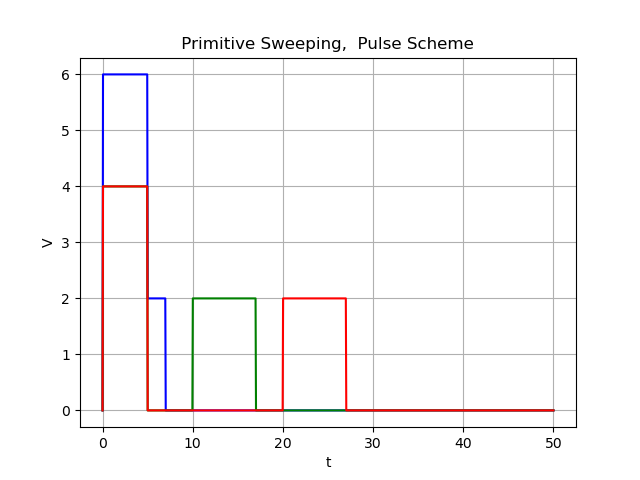

In [94]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog,obos0,'-b',label='End Pulse')#blue  = start
plt.plot(trog,obos50,'-g',label='Start Pulse') #green = mittel
plt.plot(trog,obos100,'-r',label='Mittel Pulse') #red = end
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse Scheme ')
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [59]:
Rabi

{'Amplitude': 10,
 'Start Duration': 5,
 'End Duration': 5,
 'Start time': 1e-10,
 'End time': 2e-10,
 'Sweep time': 0}

In [60]:
Probe1

{'Amplitude': 2,
 'Start Duration': 7,
 'End Duration': 7,
 'Start time': 0,
 'End time': 20,
 'Sweep time': 1}

In [61]:
Probe2

{'Amplitude': 6,
 'Start Duration': 4,
 'End Duration': 4,
 'Start time': 5,
 'End time': 11,
 'Sweep time': 1}

In [85]:
Probe0={
    'Amplitude' : 2 ,
    'Start Duration' : 4,
    'End Duration':  4,
    'Start time' : 5,
    'End time': 40,
    'Sweep time': 1
}

In [89]:
PScheme=[Rabi,Probe0]

In [90]:
pobos0=Sweep(PScheme,100,0,50);
pobos50=Sweep(PScheme,100,50,50);
pobos100=Sweep(PScheme,100,100,50);

<IPython.core.display.Javascript object>


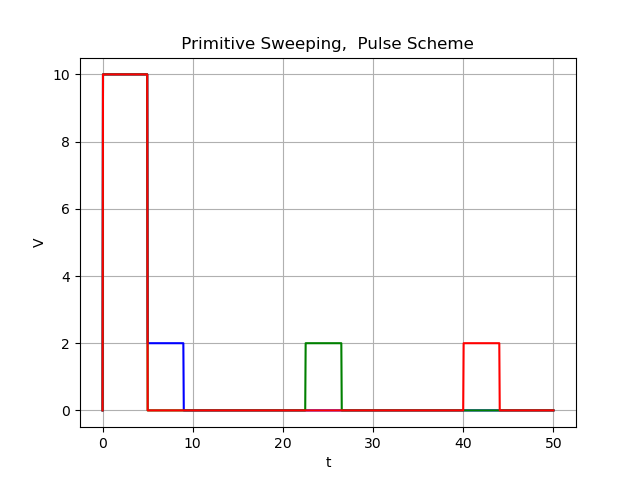

In [91]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog,pobos0,'-b',label='End Pulse')#blue  = start
plt.plot(trog,pobos50,'-g',label='Start Pulse') #green = mittel
plt.plot(trog,pobos100,'-r',label='Mittel Pulse') #red = end
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse Scheme ')
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

There is something weird with the time scale, the plot doesnt give really a vertical step, rather it has some slope. The more points within the time interval, the more vertical de step will be, or equivalently, the less points the time interval has, the slope willbe more notorious, difference by plotting with step? this does gives a step plot, but sometimes the step is not at the correct time for the pulse, but a little displaced to the left.
I believe the reason for this, the time interval may not coincide with time step interval.

In [57]:
#new duration momos
def sweep(N,Pulse,n,t):
    """description goes here"""
    time=np.linspace(-1e-10,t,1000)
    dt=(Pulse['End time'] - Pulse['Start time'])/N
    new_start=n*dt
    dτ=(Pulse['End Duration'] - Pulse['Start Duration'])/N
    new_duration= n*dτ
    if n==0:
        pol=np.array([Pul(Pulse,x) for x in time])
    else:
        pol=np.array([ Pulse['Amplitude'] * (  new_start <=  x <= new_duration + new_start) for x in time ])
    return pol